# Fysikklab, gruppe 206, team 3
___Vetle Almås, Oda Vinje Lind, Nadia Andersen Sayed, Marte Stürtzel gulbrandsen___


Følgende notebook genererer en rullebane basert på koordinatene til åtte festepunkter. 
Baneformen $y(x)$ beregnes med __CubicSpline__ fra interpolate-biblioteket i SciPy. 

# Sammendrag

Først kommer kodene som er nødvednige for å plotte figuren med våre egne verdier. Her setter vi inn festepunktene for berg-og-dal-bannen vår som er:

<par> $[0.263, 0.212, 0.206, 0.169, 0.181, 0.168, 0.169, 0.118]$

In [219]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])

xmin = 0.000
xmax = 1.401
dx = 0.001

ymax = 3 #meter
yfast = [0.263, 0.212, 0.206, 0.169, 0.181, 0.168, 0.169, 0.118] #meter
    
inttan = np.diff(yfast)/h
cs = CubicSpline(xfast, yfast, bc_type='natural')

xmin = 0.000
xmax = 1.401
dx = 0.001

x = np.arange(xmin, xmax, dx) 

Nx = len(x)
y = cs(x)       
dy = cs(x,1)    
d2y = cs(x,2)   

# Her kommer våre egne beregninger

Først velger vi baneformen og finner fart ved å sette inn funksjonen, $v(x) = \sqrt\frac{2g(y_{0} - y(x))}{1 + c}$. Verdier fra teoriarket:

<par><li> $c = 2 / 5 $
    
<par><li> $M = 30.4 [g] = 0.0304 [kg]$
    
<par><li> $R = 11 [mm] = 0.011 [m]$
    
<par><li> $g = 9.81 [m/s^2]$
    
`v_x` tilsvarer hastigheten i x-retning <br>

In [220]:
g = 9.81
M = 0.0304
R = 0.011
c = 2/5
#Io = c*M*R**2 #skal vi bruke denne til noe??

v_x = np.sqrt(2*g*(y[0]-y)/(1+c))

Deretter ønsker vi å definere krumningen, $κ = \frac{y''}{[1 + (y')^2]^{3/2}}$, og sentripetalakselerasjonen, $a⊥  = v^2κ$.  Vi finner helningsvinkelen, $β$ ved å ta $\frac{dy}{dx}$ gjennom numpy-funksjonen $np.arctan()$. Krumning og sentripetalakselerasjon brukes i ligningen for å finne normalkraften, $N$. 
Ligningen for normalkraft kommer fra:

<par><li> $N − Mg cos β = M a⊥$
    
`k` tilsvarer krumningen <br>
`k_max` og `k_min` tilsvarer den maksimale og minimale krumningen (brukes bare til info om krumningsgraf) <br>
`a_s` tilsvarer sentripetalakselerasjonen <br>
`beta_deg` tilsvarer helningsvinkelen i grader <br>
`beta_rad` tilsvarer helningsvinkelen i radianer <br>
`max_abs_beta_deg` tilsvarer den største absolutte helningsvinkelen (brukes bare til info om helningsvinkelgraf)<br>
`f` tilsvarer friksjonen <br>
`N` tilsvarer normalkraften <br>
`fN` tilsvarer absoluttverdien av friksjonen delt på normalkraften <br>
`fN_max` tilsvarer den maksimale afN (brukes bare til info om grafen mellom friksjons- og normalkraft) <br>

In [221]:
k = d2y/(1+((dy**2))**(3/2))
k_max = round(np.max(k), 1)
k_min = round(np.min(k), 1)

a_s = (v_x**2)*k

beta_deg = np.degrees(np.arctan(dy))
max_abs_beta_deg = round(np.max(np.abs(beta_deg)), 1) 
beta_rad = np.arctan(dy)

f = (2*M*g*np.sin(beta_rad))/7
N = M*(g*np.cos(beta_rad)+a_s)
fN = np.abs(f/N)
fN_max = round(np.max(fN), 2)

For å finne tiden som kulen bruker bortover x-aksen så ønsker man å finne fartskomponenten i x-retning. Dette gjør vi ved å gange arrayen `Vx` med $cos β$. Vi lager en array med kun nullere. Deretter itererer vi over denne og setter $V_{ax} = {(V_{x}[i+1] + V_x[i])}* \frac{1}{2}$. For å finne tiden lager vi en ny liste med nullere. Vi lager så en ny array, $∆t = \frac{∆x}{V_{ax}}$ og itererer over denne ved å setter $t = t + ∆t$. Vi får da ut en array som viser hvor lang tid den har brukt til et gitt punkt på x-aksen.

`Vx` tilsvarer banefarten <br>
`V_ax`tilsvarer gjennomsnittsfarten mellom to punkt i x-retning <br>
`dt` tilsvarer tiden kulen har brukt på intervallet <br>
`t` tilsvarer tiden brukt til neste punkt på x-aksen <br>

In [222]:
Vx = v_x * np.cos(beta_rad)
V_ax = np.zeros(Nx-1)
for i in range(Nx-1):
    V_ax[i] = 0.5*(Vx[i+1]+Vx[i])
    
dt = dx/V_ax #brukes denne slik som teksten sier??

t = np.zeros(Nx)
for i in range(Nx-1):
    t[i+1] = t[i]+dt[i]

Her kommer importert data fra tracker som er lagt inn i excel også behandles dette i neste celle. 

In [223]:
video_1 = pd.read_excel('fysikklab.xlsx', sheet_name='video1')

x_1 = np.array(video_1['x'])
y_1 = np.array(video_1['y'])
t_1 = np.array(video_1['t'])
ts_1 = np.array(video_1['t'])[-1]
v_1 = np.array(video_1['v'])
vs_1 = np.array(video_1['v'])[-1]


video_2 = pd.read_excel('fysikklab.xlsx', sheet_name='video2')

x_2 = np.array(video_2['x'])
y_2 = np.array(video_2['y'])
t_2 = np.array(video_2['t'])
ts_2 = np.array(video_2['t'])[-1]
v_2 = np.array(video_2['v'])
vs_2 = np.array(video_2['v'])[-1]

video_3 = pd.read_excel('fysikklab.xlsx', sheet_name='video3')

x_3 = np.array(video_3['x'])
y_3 = np.array(video_3['y'])
ts_3 = np.array(video_3['t'])[-1]
v_3 = np.array(video_3['v'])
vs_3 = np.array(video_3['v'])[-1]

video_4 = pd.read_excel('fysikklab.xlsx', sheet_name='video4')

x_4 = np.array(video_4['x'])
y_4 = np.array(video_4['y'])
ts_4 = np.array(video_4['t'])[-1]
v_4 = np.array(video_4['v'])
vs_4 = np.array(video_4['v'])[-1]

video_5 = pd.read_excel('fysikklab.xlsx', sheet_name='video5')

x_5 = np.array(video_5['x'])
y_5 = np.array(video_5['y'])
ts_5 = np.array(video_5['t'])[-1]
v_5 = np.array(video_5['v'])
vs_5 = np.array(video_5['v'])[-1]

video_6 = pd.read_excel('fysikklab.xlsx', sheet_name='video6')

x_6 = np.array(video_6['x'])
y_6 = np.array(video_6['y'])
ts_6 = np.array(video_6['t'])[-1]
v_6 = np.array(video_6['v'])
vs_6 = np.array(video_6['v'])[-1]

video_7 = pd.read_excel('fysikklab.xlsx', sheet_name='video7')

x_7 = np.array(video_7['x'])
y_7 = np.array(video_7['y'])
ts_7 = np.array(video_7['t'])[-1]
v_7 = np.array(video_7['v'])
vs_7 = np.array(video_7['v'])[-1]

video_8 = pd.read_excel('fysikklab.xlsx', sheet_name='video8')

x_8 = np.array(video_8['x'])
y_8 = np.array(video_8['y'])
ts_8 = np.array(video_8['t'])[-1]
v_8 = np.array(video_8['v'])
vs_8 = np.array(video_8['v'])[-1]

video_9 = pd.read_excel('fysikklab.xlsx', sheet_name='video9')

x_9 = np.array(video_9['x'])
y_9 = np.array(video_9['y'])
ts_9 = np.array(video_9['t'])[-1]
v_9 = np.array(video_9['v'])
vs_9 = np.array(video_9['v'])[-1]

video_10 = pd.read_excel('fysikklab.xlsx', sheet_name='video10')

x_10 = np.array(video_10['x'])
y_10 = np.array(video_10['y'])
ts_10 = np.array(video_10['t'])[-1]
v_10 = np.array(video_10['v'])
vs_10 = np.array(video_10['v'])[-1]


__Baneform:__

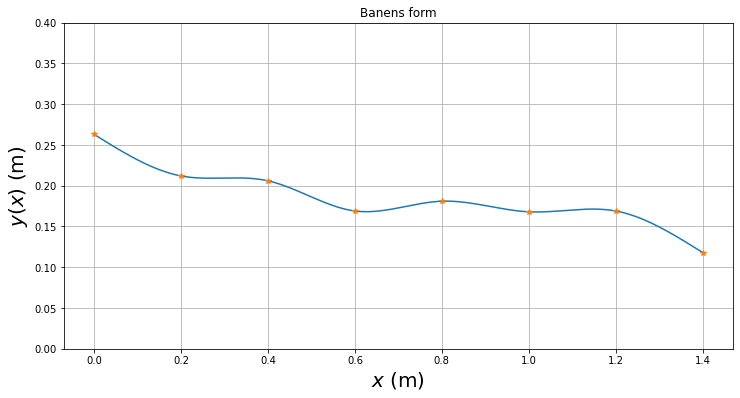

Starthøyde: 26.3 cm
Festepunkthøyder(m) [0.263, 0.212, 0.206, 0.169, 0.181, 0.168, 0.169, 0.118]


In [224]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0.0,0.40)
plt.grid()
plt.show()

print('Starthøyde:',yfast[0]*100,'cm')
print('Festepunkthøyder(m)',yfast)

Banens __helningsvinkel__ $β$ overstiger ikke 18.5◦
i absoluttverdi:

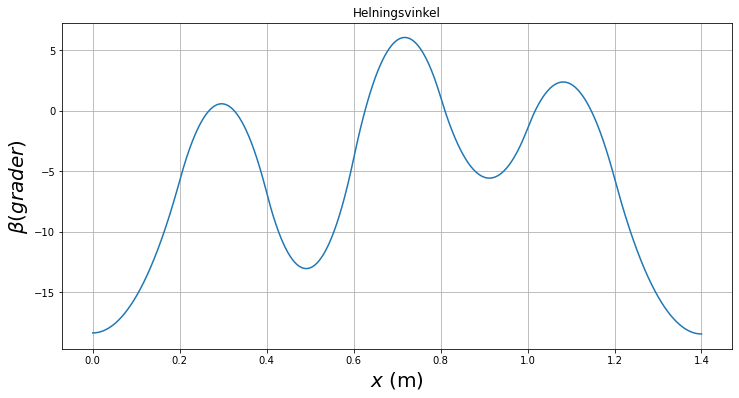

In [225]:
helningsvinkel = plt.figure('v(x)',figsize=(12,6))
plt.plot(x, beta_deg)
plt.title('Helningsvinkel')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$β(grader)$',fontsize=20)
plt.grid()
plt.show()

Banens __krumning__ ligger mellom -2.5 og 3.0, slik at minste krumningsradius er ca. ... .

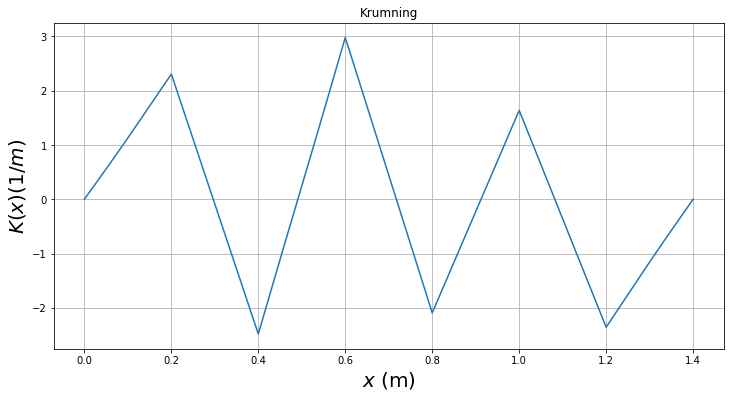

In [226]:
krumming = plt.figure('v(x)',figsize=(12,6))
plt.plot(x, k)
plt.title('Krumning')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$K(x)(1/m)$',fontsize=20)
plt.grid()
plt.show()

Med en kompakt kule ($c = \frac{2}{5}$) og $m = 30.4 g$ blir __fartsgrafen:__

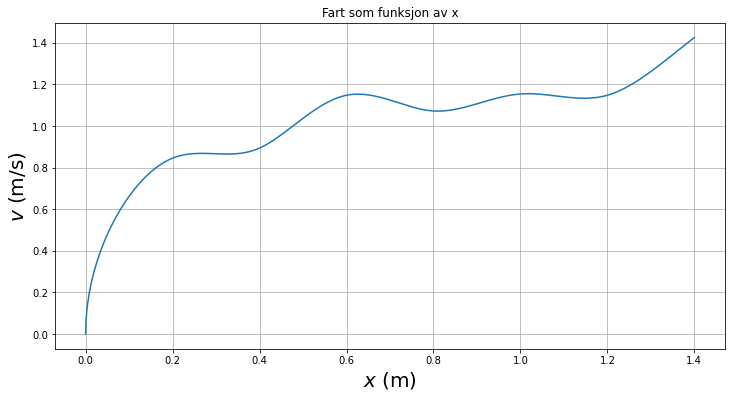

In [227]:
fart = plt.figure('v(x)',figsize=(12,6))
plt.plot(x, v_x)
plt.title('Fart som funksjon av x')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v$ (m/s)',fontsize=20)
plt.grid()
plt.show()

Under har vi plottet verdiene vi har fått ifra python for å kunne sammenligne beregnet og målte grafer.


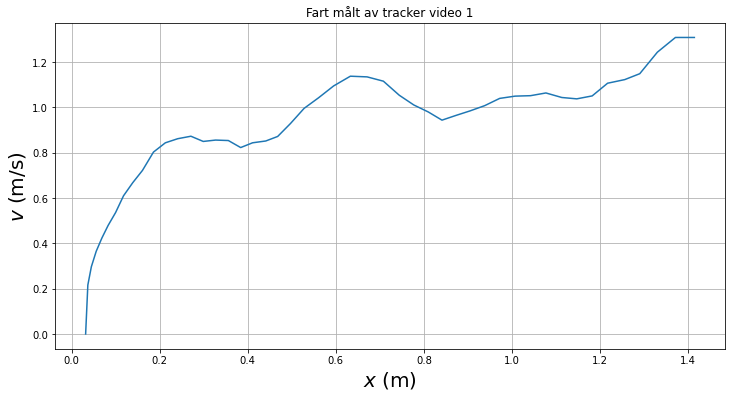

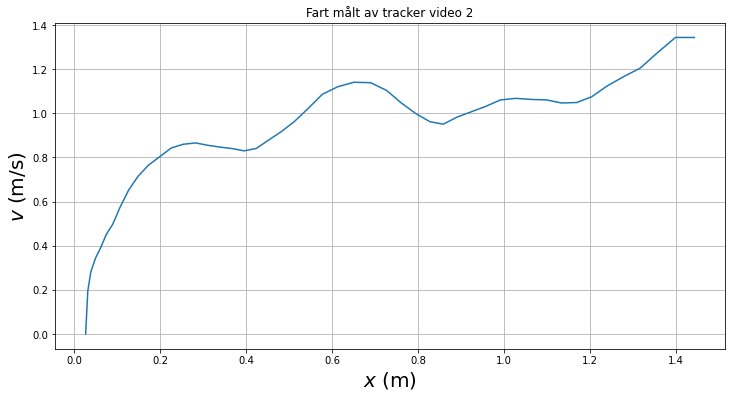

In [228]:
fart_f1 = plt.figure('v(x)',figsize=(12,6))
plt.plot(x_1, v_1)
plt.title('Fart målt av tracker video 1')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v$ (m/s)',fontsize=20)
plt.grid()
plt.show()


fart_f2 = plt.figure('v(x)',figsize=(12,6))
plt.plot(x_2, v_2)
plt.title('Fart målt av tracker video 2')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v$ (m/s)',fontsize=20)
plt.grid()
plt.show()

__Normalkraften:__

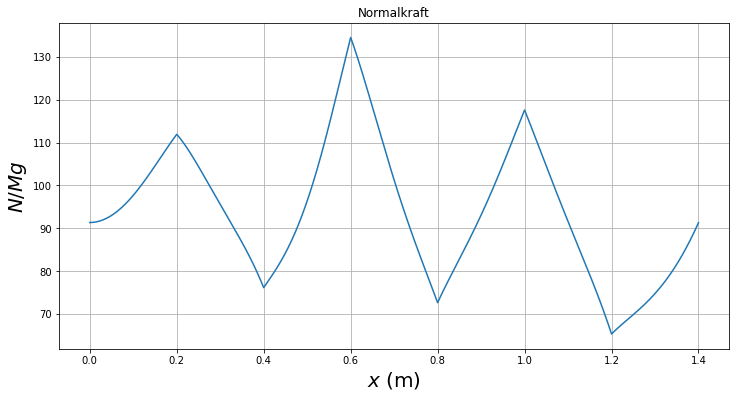

In [229]:
normalkraft = plt.figure('v(x)',figsize=(12,6))
plt.plot(x, N/M*g)
plt.title('Normalkraft')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$N/Mg$',fontsize=20)
plt.grid()
plt.show()

__Forholdet mellom friksjonskraften og normalkraften__ overstiger ikke verdeien 0.10:

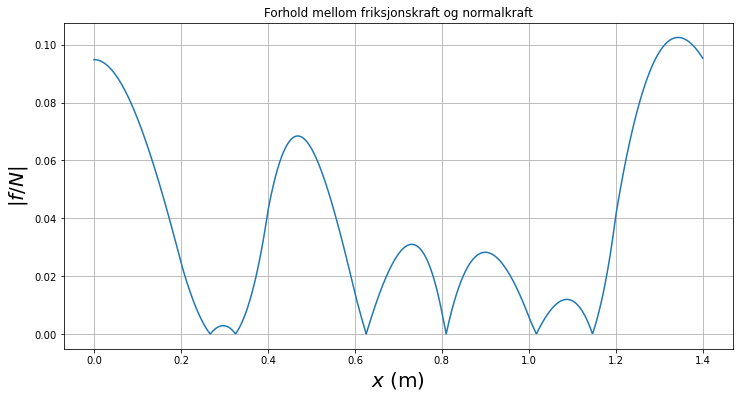

In [230]:
friksjon= plt.figure('v(x)',figsize=(12,6))
plt.plot(x, fN)
plt.title('Forhold mellom friksjonskraft og normalkraft')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$|f/N|$',fontsize=20)
plt.grid()
plt.show()

__Horistontal posisjon som funksjon av tid:__

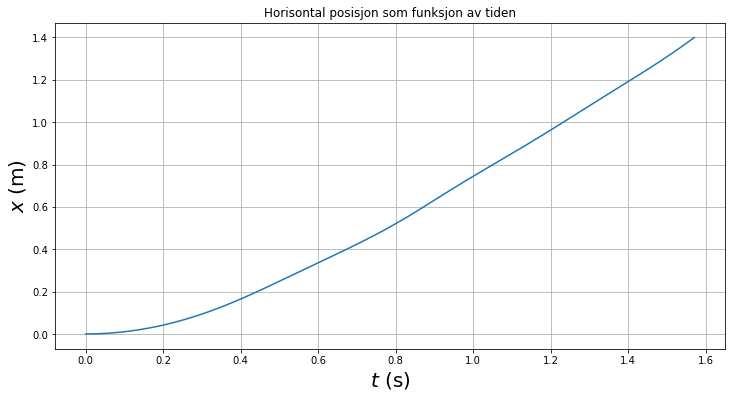

Vi ser at reisen tok ca. 1.57 sekunder.


In [231]:
tid = plt.figure('v(x)',figsize=(12,6))
plt.plot(t, x)
plt.title('Horisontal posisjon som funksjon av tiden')
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('$x$ (m)',fontsize=20)
plt.grid()
plt.show()

print('Vi ser at reisen tok ca.', round(t[-1], 2) , 'sekunder.')

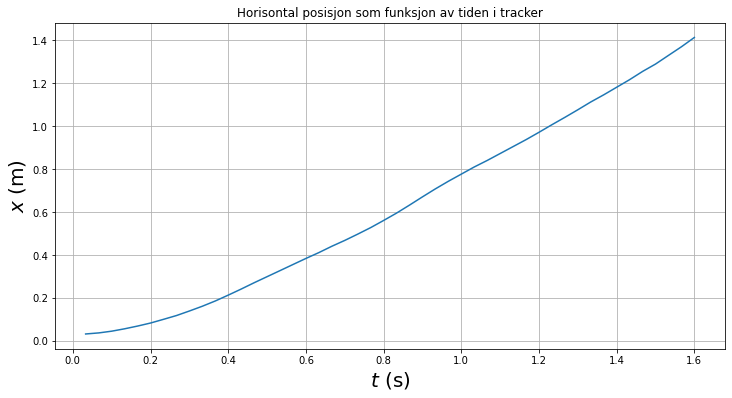

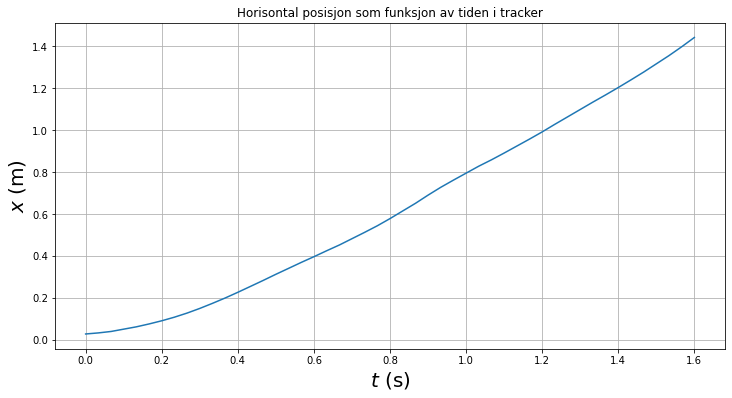

In [235]:

tid = plt.figure('v(x)',figsize=(12,6))
plt.plot(t_1, x_1)
plt.title('Horisontal posisjon som funksjon av tiden i tracker')
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('$x$ (m)',fontsize=20)
plt.grid()
plt.show()

tid = plt.figure('v(x)',figsize=(12,6))
plt.plot(t_2, x_2)
plt.title('Horisontal posisjon som funksjon av tiden i tracker')
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('$x$ (m)',fontsize=20)
plt.grid()
plt.show()


__Hastighet v som funksjon av tiden t:__

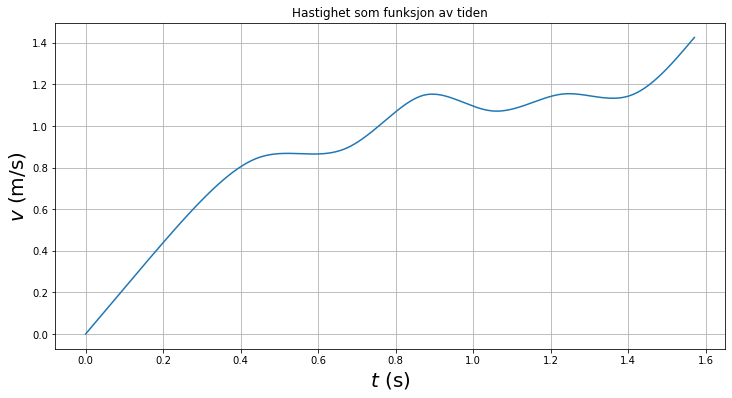

In [233]:
fartvedtid = plt.figure('v(x)',figsize=(12,6))
plt.plot(t, v_x)
plt.title('Hastighet som funksjon av tiden')
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('$v$ (m/s)',fontsize=20)
plt.grid()
plt.show()

Vi har beregnet gfjennomsnittelig sluttfart, og gjennomsnittelig tid for alle 10 videoene.
Vi har og beregnet standaravviket og standardfeil(usikkerhet) for sluttfarten.

In [234]:

gjennsnitt_sluttfart = np.round(np.average([vs_1, vs_2, vs_3, vs_4, vs_5, vs_6, vs_7, vs_8, vs_9, vs_10]),3)
gjennsnitt_tid = np.round(np.average([ts_1, ts_2, ts_3, ts_4, ts_5, ts_6,ts_7,ts_8,ts_9,ts_10]),3)

standardavvik_vs = np.round(np.std([vs_1, vs_2, vs_3, vs_4, vs_5, vs_6, vs_7, vs_8, vs_9, vs_10]),4)
usikkerhet_vs = np.round(standardavvik_vs/np.sqrt(10),4)

print(gjennsnitt_sluttfart)
print(gjennsnitt_tid)

print(standardavvik_vs)
print(usikkerhet_vs)

1.328
1.587
0.0184
0.0058
